# Variables qualitatives et indépendance

In [2]:
%matplotlib nbagg

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exercice

Nous allons étudier des données sur (une partie) des passagers du *RMS Titanic*, qui a fait naufrage en avril 1912. 
Nous disponsons, entre autre,  des informations suivantes sur les passagers : le nom, le sexe, l'âge, le port d'embarcation, le prix du billet, la classe et, bien sûr, l'information si le passager a survécu au naufrage ou pas. 
 

1. Importer le tableau des données disponible à l'adresse http://www.proba.jussieu.fr/pageperso/rebafka/titanic-passengers.csv

2. - Familiarisez-vous avec les données (taille du tableau, type des variables etc.). 
   - Vérifier s'il y a des **NaN** (mais ne supprimer pas les lignes correspondantes s'il y en a).
   - Créer un tableau qui ne contient que les variables **Survived**, **Pclass**, **Sex**, **Age** et **Embarked**. 

3. - Tracer l'histogramme de la répartition de l'âge des passagers. 
   - Pour cet exercice, au lieu de travailler avec l'âge exacte des passagers,  on préfère regrouper les passagers par   tranches d'âge : ajouter une colonne nommée **Tranche d'age** au tableau qui indique l'âge par   tranche de dix ans. Par exemple, on mettra 0 pour des enfants de moins de 10, 10 pour les personnes de 10 à 19 etc.

4. Nous nous intéressons particulièrement à la variable **Survived** et à la question si cette variable est indépendante des autres variables. 
    - Pour commencer, calculer la proportion de passagers ayant survécu. 
    - Ensuite, calculer le nombre et la proportion de femmes et puis d'hommes qui ont survécu. 
    - Représenter ces valeurs par un diagramme en bâtons. 
    - Est-ce que les variables **Survived** et **Sex** semblent être  indépendantes ?

5. 
    - Ecrire une fonction qui prend en argument une variable **var** du tableau de données. Cette fonction  trace le diagramme en bâtons  représentant le nombre de survivants/morts par groupe donné par la variable **var**. (Autrement dit, si **var** est la variable **Sex**, on obtient le même diagramme qu'à la question précédente.) 
    - Appliquer cette fonction aux variables  **Pclass**,  **Tranche d'age** et **Embarked** et interpréter les graphiques.

6. Calculer la statisique de $\chi^2$ et la *p-value* correspondante
pour tester l'indépendance des variables **Survived** et **Sex**. Interpréter le résultat.

7. 
    - Ecrire une fontion qui prend en argument une variable **var** du tableau de données. Cette fonction calcule la statisique de $\chi^2$ et la *p-value* correspondante pour tester l'indépendance des variables **Survived** et **var**. 
    - Appliquer cette fonction aux variables  **Pclass**,  **Tranche d'age** et **Embarked** et interpréter les résultats.
    
    
    
# Exercice à rendre

Pour cet exercice, vous pouvez utiliser toutes les variables du tableau de données de départ, si elles  vous semblent pertinentes. 

Voici encore quelques détails sur les variables :
- **SibSp** représente le nombre de frères et soeurs ou époux(se) à bord
- **Parch** est le nombre de parents ou enfants à bord
- **Ticket** est le numéro de billet
- **Fare** est le prix du billet
- **Cabin** est le(s) numéro(s) de cabine(s)
- **Embarked** est le port d'embarcation avec *'S'* pour Southampton, *'Q'* pour Queenstown et *'C'* pour Cherbourg.


L'exercice consiste à rédiger un petit article  qui donne une caractérisation des passagers du Titanic. L'article donnera des informations sur le type de personnes qui ont embarqué (des hommes/femmes, des enfants ou des personnes agées, leur répartition sur les différentes classes etc.) sans être exhaustif. Il faut que l'article soit agréable à lire.  Au mieux, vous  racontez une petite histoire distrayante sur les passagers du Titanic. Dans cet article, il y a de la place pour une seule figure. Il est clair  qu'il ne faut absolument pas parler de code Python ou de problèmes de programmation.

Vous devez rendre votre article en format **pdf** ET le notebook qui contient le code et les graphiques qui ont servi à faire  votre analyse des données.

Ce devoir est **à rendre au plus tard le vendredi 24 mars** dans votre boîte de dépôt sur Sakai.

Vous pouvez rendre cet exercice en binôme. Dans ce cas, **chacun doit en déposer une copie dans sa boîte de dépôt Sakai** ET il faut **indiquer vos deux noms** sur les documents déposés.




In [3]:
tita = pd.read_csv('http://www.proba.jussieu.fr/pageperso/rebafka/titanic-passengers.csv',sep=';')
tita.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,28,No,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
1,557,Yes,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
2,592,Yes,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
3,586,Yes,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
4,552,No,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S


In [4]:
print(tita.shape)
print(tita.isnull().sum())

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
tita[tita['Embarked'].isnull()]
tita['Fare'].quantile(q=[.25,.5,.75])

0.25     7.9104
0.50    14.4542
0.75    31.0000
Name: Fare, dtype: float64

ttn= pd.dataframe(tita['Survived'])

In [6]:
ttn= pd.DataFrame(tita['Survived'])
ttn['Pclass']= tita['Pclass']
ttn['Sex']= tita['Sex']
ttn['Age']= tita['Age']
ttn['Embarked']= tita['Embarked']
ttn["Tranche d'age"] = np.floor(ttn['Age']/10)*10
prix= pd.Series([])
k=0
for f in tita['Fare']:
    if f >= 31.0:
        prix[k]= 'Cher'
    elif f < 15.0:
        prix[k]= 'Bas'
    else:
        prix[k]= 'Moyen'
    k += 1
ttn['Prix']= prix
ttn.head()

,Survived,Pclass,Sex,Age,Embarked,Tranche d'age,Prix
0,No,1,male,19.0,S,10.0,Cher
1,Yes,1,female,48.0,C,40.0,Cher
2,Yes,1,female,52.0,C,50.0,Cher
3,Yes,1,female,18.0,S,10.0,Cher
4,No,2,male,27.0,S,20.0,Moyen


In [16]:
def diag_embark(x):
    mod = pd.Series(ttn[x].unique())
    nb_mod = mod.size
    tab = pd.DataFrame(mod)
    effectif_tt= pd.Series([])
    effectif_S = pd.Series([])
    effectif_C = pd.Series([])
    effectif_Q = pd.Series([])
    effectif_nan = pd.Series([])
    i=0
    for m in mod:
        if pd.isnull(m):
            effectif_tt[i] = (ttn[x].isnull()).sum()
            effectif_S[i] = ((ttn[x].isnull() ) & (ttn['Embarked'] == 'S')).sum()
            effectif_C[i] = ((ttn[x].isnull() ) & (ttn['Embarked'] == 'C')).sum()
            effectif_Q[i] = ((ttn[x].isnull() ) & (ttn['Embarked'] == 'Q')).sum()
            effectif_nan[i] = ((ttn[x].isnull()) & (ttn['Embarked'].isnull())).sum()
        else:
            effectif_tt[i] = (ttn[x] == m).sum()
            effectif_S[i] = ((ttn[x] == m ) & (ttn['Embarked'] == 'S')).sum()
            effectif_C[i] = ((ttn[x] == m ) & (ttn['Embarked'] == 'C')).sum()
            effectif_Q[i] = ((ttn[x] == m ) & (ttn['Embarked'] == 'Q')).sum()
            effectif_nan[i] = ((ttn[x] == m ) & (ttn['Embarked'].isnull())).sum()
        i = i+1
    
    ind = np.arange(nb_mod) # les coordonnées des abscisses x des bâtons
    width = 0.35
    
    quai_S = effectif_S
    quai_C = effectif_C
    quai_Q = effectif_Q
    quai_nan = effectif_nan
    
    plt.figure()
    p1 = plt.bar(ind, quai_S, width, color='c')
    p2 = plt.bar(ind, quai_C, width, color='g', bottom=quai_S)
    p3 = plt.bar(ind, quai_Q, width, color='b', bottom=quai_C)
    p4 = plt.bar(ind, quai_nan, width, color='r', bottom=quai_Q)
    
    plt.title(u'Nombres de personnes ayant embarqué par quai par modalité')
    plt.xticks(ind + width/2., mod)
    plt.legend((p1[0], p2[0],p3[0], p4[0]), ('Quai S', 'Quai C','Quait Q', 'nan'),loc=0)
   

In [12]:
def diag_Prix(x):
    mod = pd.Series(ttn[x].unique())
    nb_mod = mod.size
    tab = pd.DataFrame(mod)
    effectif_tt= pd.Series([])
    effectif_cher = pd.Series([])
    effectif_moyen = pd.Series([])
    effectif_bas = pd.Series([])
    i=0
    for m in mod:
        if pd.isnull(m):
            effectif_tt[i] = (ttn[x].isnull()).sum()
            effectif_cher[i] = ((ttn[x].isnull() ) & (ttn['Prix'] == 'Cher')).sum()
            effectif_moyen[i] = ((ttn[x].isnull() ) & (ttn['Prix'] == 'Moyen')).sum()
            effectif_bas[i] = ((ttn[x].isnull() ) & (ttn['Prix'] == 'Bas')).sum()
        else:
            effectif_tt[i] = (ttn[x] == m).sum()
            effectif_cher[i] = ((ttn[x] == m ) & (ttn['Prix'] == 'Cher')).sum()
            effectif_moyen[i] = ((ttn[x] == m ) & (ttn['Prix'] == 'Moyen')).sum()
            effectif_bas[i] = ((ttn[x] == m ) & (ttn['Prix'] == 'Bas')).sum()
        i = i+1
    
    ind = np.arange(nb_mod) # les coordonnées des abscisses x des bâtons
    width = 0.35
    
    cher = effectif_cher
    moyen= effectif_moyen
    bas = effectif_bas
    
    plt.figure()
    p1 = plt.bar(ind, cher, width, color='c')
    p2 = plt.bar(ind, moyen, width, color='g', bottom=cher)
    p3 = plt.bar(ind, bas, width, color='b', bottom=moyen)
    
    plt.title(u'Nombres de personnes par niveau de prix par modalité')
    plt.xticks(ind + width/2., mod)
    plt.legend((p1[0], p2[0],p3[0]), ('Cher', 'Moyen','Bas'),loc=0)

<IPython.core.display.Javascript object>


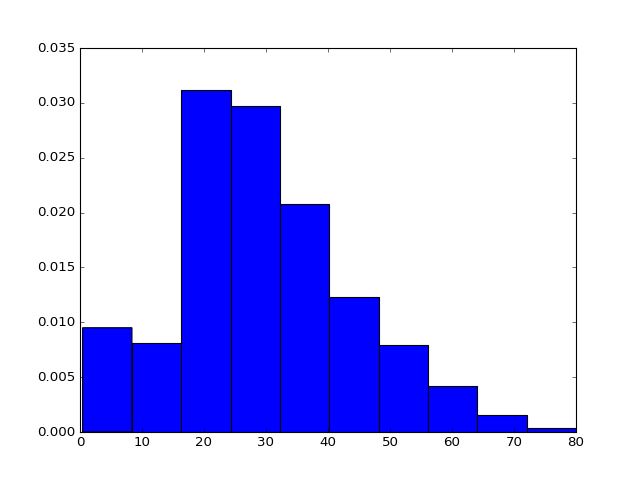

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
age = tita['Age'].dropna()
plt.figure()
plt.hist(age, normed=True)
age.describe()

In [42]:
def histo_qual(x):
    mod = pd.Series(ttn[x].unique())
    mod = mod.sort_values()
    nb_mod = mod.size
    effectif_tt = pd.Series([])
    i=0
    for m in mod:
        if pd.isnull(m):
            effectif_tt[i] = (ttn[x].isnull()).sum()
        else:
            effectif_tt[i] = (ttn[x] == m).sum()
        i = i+1
    
    ind = np.arange(nb_mod) # les coordonnées des abscisses x des bâtons
    width = 0.35
    
    #plt.figure()
    p1 = plt.bar(ind, effectif_tt, width, color='g')
    
    plt.title(u'Effectif par modalité de '+ x)
    plt.xticks(ind + width/2., mod)
   

<IPython.core.display.Javascript object>


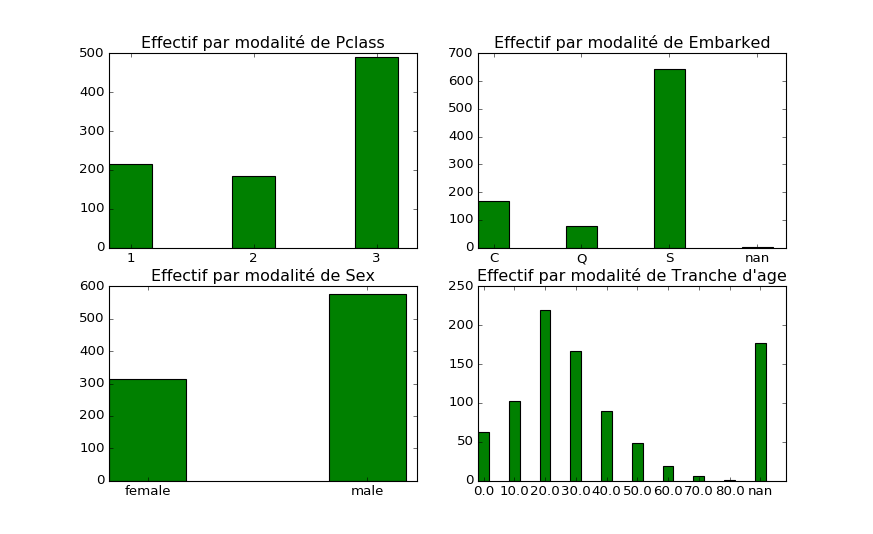

In [43]:
plt.figure()
plt.subplot(221)
histo_qual('Pclass')
plt.subplot(222)
histo_qual("Embarked")
plt.subplot(223)
histo_qual('Sex')
plt.subplot(224)
histo_qual("Tranche d'age")

In [8]:
ttn['Prix'].value_counts()

Bas      457
Cher     225
Moyen    209
Name: Prix, dtype: int64

<IPython.core.display.Javascript object>


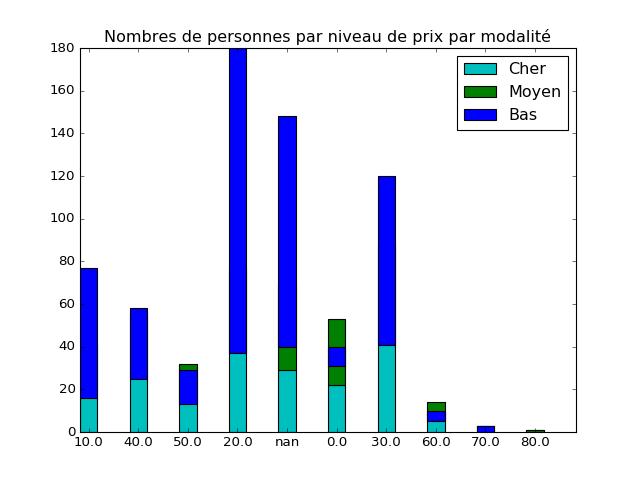

In [14]:
diag_Prix("Tranche d'age")

<IPython.core.display.Javascript object>


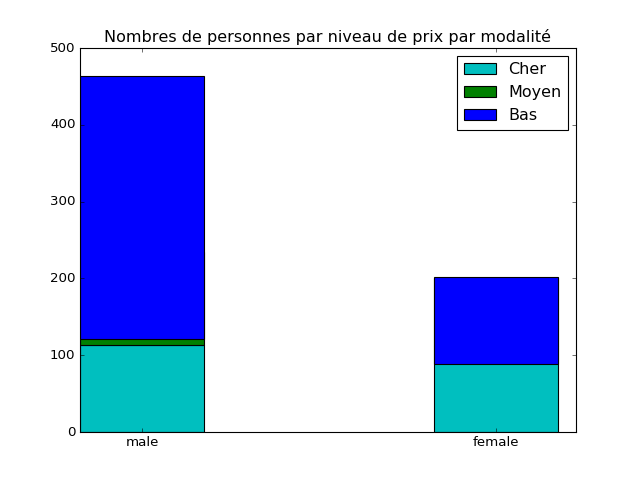

In [13]:
diag_Prix('Sex')

In [18]:
def diag_sexe(x):
    mod = pd.Series(ttn[x].unique())
    nb_mod = mod.size
    tab = pd.DataFrame(mod)
    effectif_tt= pd.Series([])
    effectif_male = pd.Series([])
    i=0
    for m in mod:
        if pd.isnull(m):
            effectif_tt[i] = (ttn[x].isnull()).sum()
            effectif_male[i] = ((ttn[x].isnull() ) & (ttn['Male'] == 'Yes')).sum()
        else:
            effectif_tt[i] = (ttn[x] == m).sum()
            effectif_male[i] = ((ttn[x] == m ) & (ttn['Male'] == 'Yes')).sum()
        i = i+1
    tab['effectif_tt']=effectif_tt
    tab['effectif_male']=effectif_male
    tab['effectif_female']=effectif_tt-effectif_male
    
    ind = np.arange(nb_mod) # les coordonnées des abscisses x des bâtons
    width = 0.35
    
    male = tab['effectif_male']
    female = tab['effectif_female']
    
    plt.figure()
    p1 = plt.bar(ind, male, width, color='r')
    p2 = plt.bar(ind, female, width, color='g', bottom=male)
    
    plt.title(u'Nombres de morts/vivants par modalité')
    plt.xticks(ind + width/2., mod)
    plt.legend((p1[0], p2[0]), ('Morts', 'Vivants'),loc=0)
   

In [9]:
print(ttn['Embarked'].value_counts())
print(((ttn['Embarked']=="Q") & (ttn['Prix']=='Cher')).sum())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
2


<IPython.core.display.Javascript object>


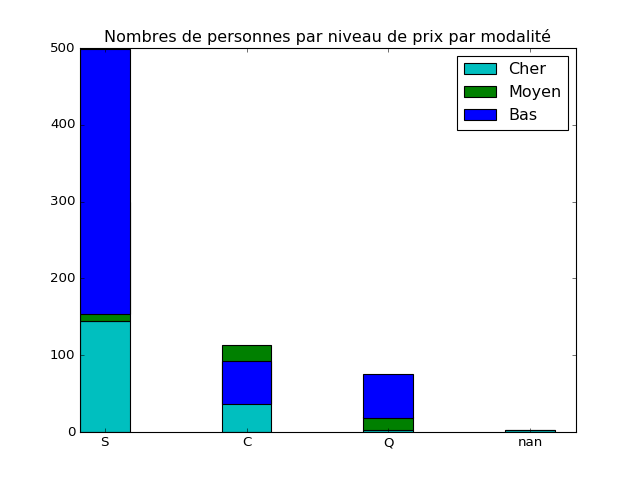

In [26]:
diag_Prix('Embarked')

In [36]:
print((tita['SibSp']>0).sum()/891.0)
print(((tita['SibSp']>0) & (tita['Sex']=='female')).sum()/(tita['Sex']=='female').sum())
print(((tita['SibSp']>0) & (tita['Sex']=='male')).sum()/(tita['Sex']=='male').sum())


0.317620650954
0.445859872611
0.247833622184
